In [ ]:
# Import des librairies nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import scipy
import sklearn

In [2]:
# On charge le dataset qui contient toutes les données répertoriées
olist = pd.read_csv('olist.csv')

## Préparation des données

On procède à la préparation des données pour avoir les données concernant chaque période.

In [43]:
# On définit une fonction qui sélectionne les features qui nous ont déjà pour notre segmentation. Le paramètre ts
# nous servira à avoir les données cumulées à une période t 
def clustering(df, ts):
    df.order_purchase_timestamp = pd.to_datetime(df.order_purchase_timestamp)
    df = df.loc[df.order_purchase_timestamp<=ts]
    df = df [['orders_nb', 'nb_order_items', 'payment_value','product_description_lenght',
              'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm',
              'product_width_cm']]
    return df

In [28]:
# On prend comme modèle de base les données concernant les commandes effectuées jusqu'à mai 2017 soit à T0 + 6 mois
# T0 représentant la date de la première commande
clustering_base = clustering(olist, '2017-05')

In [29]:
clustering_base

,orders_nb,nb_order_items,payment_value,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
2,1,1,86.22,177.0,3.0,1500.0,25.0,50.0,35.0
8,1,1,150.12,1118.0,6.0,2250.0,22.0,15.0,20.0
26,1,1,76.11,1854.0,6.0,525.0,29.0,16.0,20.0
27,1,1,297.14,278.0,1.0,200.0,18.0,8.0,16.0
34,1,1,58.86,200.0,1.0,600.0,40.0,5.0,30.0
...,...,...,...,...,...,...,...,...,...
95788,1,1,110.70,111.0,1.0,1750.0,30.0,20.0,25.0
95790,1,1,162.10,1132.0,2.0,350.0,18.0,15.0,16.0
95804,1,1,665.70,779.0,2.0,7100.0,36.0,47.0,32.0
95809,1,1,32.42,647.0,1.0,225.0,18.0,16.0,46.0


In [30]:
# On entraîne un modèle KMean sur notre modèle de base
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=6, max_iter=10000)
kmean.fit_predict(clustering_base)

array([0, 0, 3, ..., 5, 3, 3], dtype=int32)

# Calcul ARI Score

Définition : le ARI (adjusted rank index) mesure la similarité de deux prédictions. C'est un indicateur fiable de la stabilité d'une segmentation.

Principe : 

    1) On entraîne les données représentant les clients de la période T0 sur un modèle M0. On obtient les labels L0.
    
    2) On sélectionne les données des clients de la période T0+t et on les entraîne sur un modèle M1. On obtient les labels L1M1.
    
    3) On prédit les labels de la période T0+t avec M0 pour obtenir les labels L1M0.
    
    4) On calcule le ARI de la période T0+t à l'aide de L1M0 et L1M1.
    

In [31]:
# Fonction qui prend en paramètre les données cumulatives à l'instant t ainsi que le modèle KMeans entraîné 
# sur le clustering de base 

from sklearn import metrics
from sklearn.metrics import adjusted_rand_score
def ARI_score(clustering, kmean):
    kmeans_Update = KMeans(n_clusters=6, max_iter=10000)
    kmeans_Update.fit(clustering)
    return metrics.adjusted_rand_score(kmeans_Update.labels_, kmean.predict(clustering))

In [32]:
# Stockage de dates dans une liste pour obtenir les données de chaque période
dates = ['2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03','2018-04', '2018-05', '2018-06', '2018-07', '2018-08','2018-09']

In [38]:
# On va stocker les scores ARI des différents obtenus dans la liste scores afin de plot la courbe représentant 
# les variations du ARI score
scores = []
for i in dates:
    scores.append(ARI_score(clustering(olist, i), kmean))

/home/jo/miniconda3/envs/johnny_lerouge/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:389: RuntimeWarning: overflow encountered in long_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +
/home/jo/miniconda3/envs/johnny_lerouge/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:389: RuntimeWarning: overflow encountered in long_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +
/home/jo/miniconda3/envs/johnny_lerouge/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:389: RuntimeWarning: overflow encountered in long_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +
/home/jo/miniconda3/envs/johnny_lerouge/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:390: RuntimeWarning: overflow encountered in long_scalars
  (tp + fp) * (fp + tn))
/home/jo/miniconda3/envs/johnny_lerouge/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:389: RuntimeWarning: over

In [75]:
# Affichage des scores ARI
scores

[0.9957813967366965,
 0.9719280714047123,
 0.9901507904064424,
 0.9893696629421169,
 0.9749003385577947,
 0.9928019580007447,
 0.9922311485838876,
 0.9915700344427746,
 0.9916498039720306,
 0.9799684865805456,
 0.023212765156241266,
 0.21125898298196066,
 0.38593447186005125,
 0.20164460763658432,
 0.7316704767675398]

Text(0, 0.5, 'Score ARI')

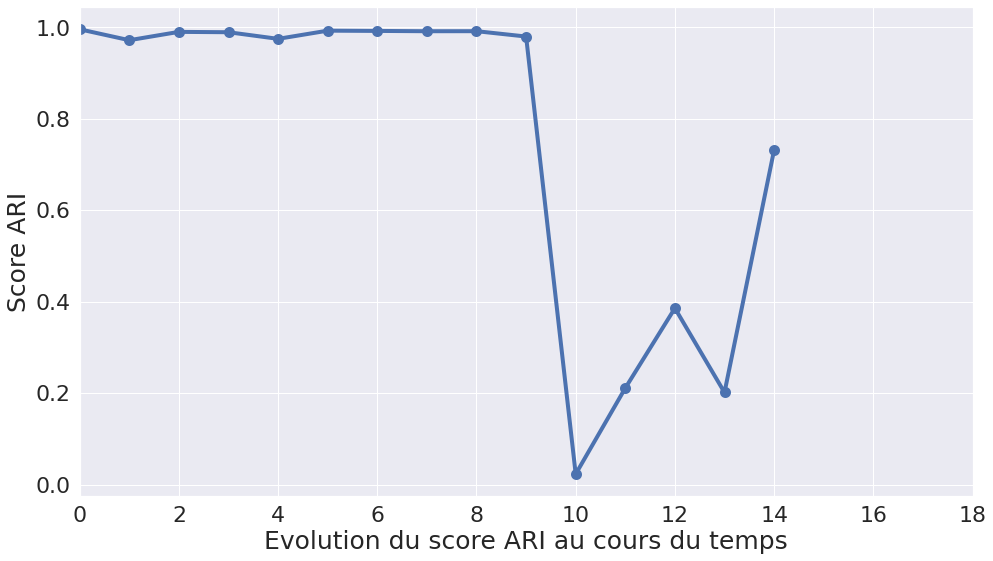

In [76]:
# Graphe représentant l'évolution du ARI score à travers le temps 
sns.set(rc={'figure.figsize':(16,9)}, font_scale = 2)

plt.plot(scores, 'b', marker = 'o', linewidth = 4,markeredgewidth = 5)
plt.xlim(0,18)
plt.xlabel('Evolution du score ARI au cours du temps', fontsize=25)
plt.ylabel('Score ARI', fontsize=25)

## Conclusion

On voit que, selon le ARI score, le clustering est très robuste durant les 10 premiers mois suivants le clustering de base. 

Néanmoins il s'effondre au 11e mois. Nous proposerons donc à notre client une mise à jour de la segmentation tous les 9 mois afin de s'adapter au changement de comportement des clients.